In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [14]:
n_players = 100_000

amigos = np.random.choice(['si', 'no'], size=n_players, p=[0.30, 0.70])
precio = np.random.choice(['alto', 'medio','bajo'], size=n_players, p=[0.33, 0.33, 0.34])
genero = np.random.choice(['accion', 'aventura','estrategia','otros'], size=n_players, p=[0.2, 0.4, 0.2, 0.2])

p_map = {
    ('alto',  'si', 'accion'):     0.06,
    ('alto',  'si', 'aventura'):   0.05,
    ('alto',  'si', 'estrategia'): 0.04,
    ('alto',  'si', 'otros'):      0.03,
    ('alto',  'no', 'accion'):     0.03,
    ('alto',  'no', 'aventura'):   0.02,
    ('alto',  'no', 'estrategia'): 0.015,
    ('alto',  'no', 'otros'):      0.01,

    ('medio', 'si', 'accion'):     0.15,
    ('medio', 'si', 'aventura'):   0.12,
    ('medio', 'si', 'estrategia'): 0.10,
    ('medio', 'si', 'otros'):      0.08,
    ('medio', 'no', 'accion'):     0.08,
    ('medio', 'no', 'aventura'):   0.06,
    ('medio', 'no', 'estrategia'): 0.05,
    ('medio', 'no', 'otros'):      0.03,

    ('bajo',  'si', 'accion'):     0.25,
    ('bajo',  'si', 'aventura'):   0.22,
    ('bajo',  'si', 'estrategia'): 0.20,
    ('bajo',  'si', 'otros'):      0.18,
    ('bajo',  'no', 'accion'):     0.12,
    ('bajo',  'no', 'aventura'):   0.10,
    ('bajo',  'no', 'estrategia'): 0.08,
    ('bajo',  'no', 'otros'):      0.05,
}

p_compra = np.zeros(n_players)
for i in range(n_players):
    p_compra[i] = p_map.get((precio[i], amigos[i], genero[i]), 0.001)

compra = np.random.binomial(1, p_compra)

data = pd.DataFrame({
    'precio': precio,
    'genero': genero,
    'amigos': amigos,
    'compra': compra
})

data.head()


,precio,genero,amigos,compra
0,medio,aventura,no,0
1,medio,aventura,no,0
2,medio,accion,no,0
3,medio,aventura,no,0
4,medio,aventura,si,1


In [15]:
prob_compra = (
    data.groupby(['precio', 'genero', 'amigos'])['compra']
        .mean()
        .reset_index()
)

prob_compra['Etiqueta'] = (
    prob_compra['precio'] + ' y ' +
    prob_compra['genero'] + ' y ' +
    prob_compra['amigos']
)

prob_compra.head(10)


,precio,genero,amigos,compra,Etiqueta
0,alto,accion,no,0.025462,alto y accion y no
1,alto,accion,si,0.055869,alto y accion y si
2,alto,aventura,no,0.019550,alto y aventura y no
3,alto,aventura,si,0.046118,alto y aventura y si
4,alto,estrategia,no,0.014775,alto y estrategia y no
5,alto,estrategia,si,0.037882,alto y estrategia y si
6,alto,otros,no,0.009313,alto y otros y no
7,alto,otros,si,0.037019,alto y otros y si
8,bajo,accion,no,0.125849,bajo y accion y no
9,bajo,accion,si,0.256337,bajo y accion y si


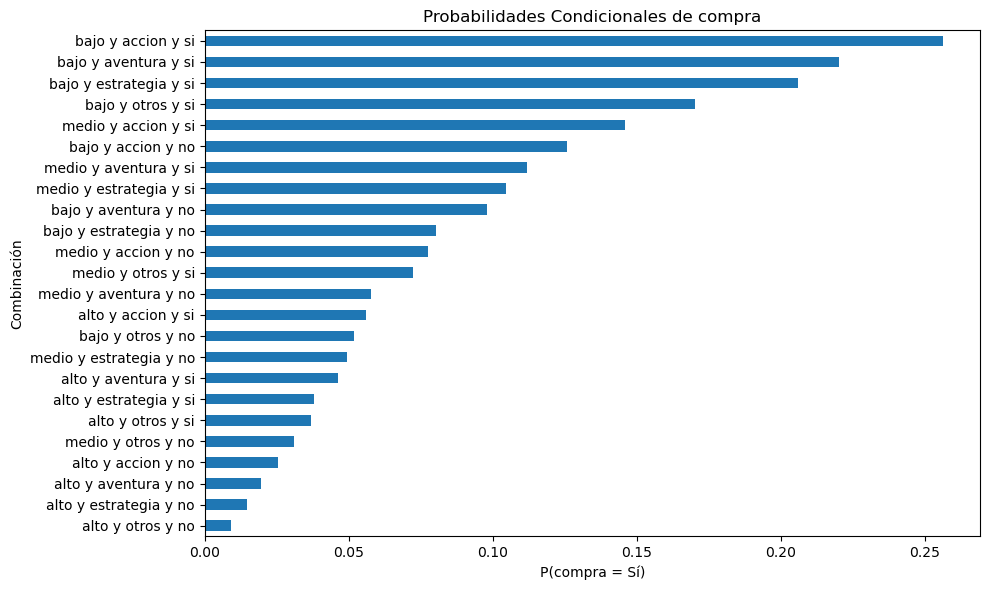

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
prob_compra.sort_values('compra').plot(kind='barh', x='Etiqueta', y='compra', ax=ax, legend=False)

ax.set_xlabel('P(compra = Sí)')
ax.set_ylabel('Combinación')
ax.set_title('Probabilidades Condicionales de compra')
plt.tight_layout()

plt.savefig('probabilidades_condicionales_compra.png')
plt.show()
